In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Lambda
from keras.layers.embeddings import Embedding
import keras.backend as K

Using Theano backend.


In [2]:
# 词汇表长度，也就是词嵌入矩阵的行数
vocab_size = 5000
# 投影层的输出维度
embed_size = 300
# 上下文窗口的大小
window_size = 1

# 实例化模型
model = Sequential()
# 添加嵌入层
model.add(Embedding(input_dim=vocab_size,   # 输入时每个词用One-Hot向量表示，因此输入矩阵维度为词汇表的大小5000
                    output_dim=embed_size,  # 嵌入层输出的维度为所要得到的词嵌入的词语向量维度300
                    embeddings_initializer='glorot_uniform',  # 词嵌入矩阵元素值初始化方法
                    input_length=window_size*2))  # 输入矩阵的行数为
# 投影层
model.add(Lambda(lambda x: K.mean(x, axis=1),   # 加和窗口内的每个词向量求平均
                 output_shape=(embed_size,)))   # 投影层输出维度为词嵌入矩阵的维度300
# 输出层
model.add(Dense(vocab_size,  # 中间词属于词典中每个词的概率，因此输出维度为词汇表大小5000
                kernel_initializer='glorot_uniform', 
                activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2, 300)            1500000   
_________________________________________________________________
lambda_1 (Lambda)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5000)              1505000   
Total params: 3,005,000
Trainable params: 3,005,000
Non-trainable params: 0
_________________________________________________________________


In [3]:
# 查看嵌入层的参数矩阵，也就是词嵌入模型矩阵形状
model.get_layer('embedding_1').get_weights()[0].shape

(5000, 300)

In [4]:
from keras.utils import plot_model

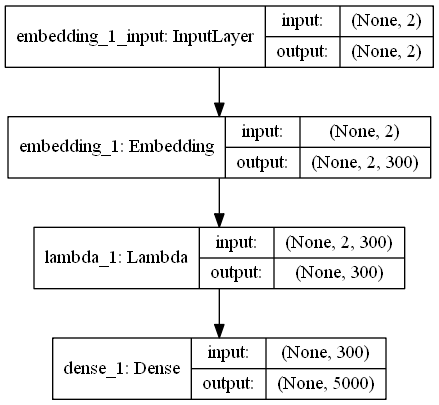

In [5]:
plot_model(model, to_file='./cbow.png', show_shapes=True)